# Import modules

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# General

In [27]:
num_of_values = 10000
tests = 3
bins = 20

theor_chi_squared = input("theor_chi_squared for 1: ")

theor_chi_squared for 1: 28.9


# Helper methods

In [28]:
    def create_values(lambda_val, num_of_values):
        x = np.array([])
        for i in range(0, num_of_values):
            ksi = random.uniform(0, 1)
            x = np.append(x, -np.log(ksi) / lambda_val)
        return x
    def mu(): 
        sum = 0.0 
        for i in range(1, 13): 
            sum += random.uniform(0,1)   
        return sum - 6
    def create_values2(num_of_values, sigma, alpha): 
        x = np.array([])
        for i in range(0, num_of_values):
            x = np.append(x, sigma * mu() + alpha)
        return x
    def create_values3(a, c, num_of_values):
        z = random.random()
        x = np.array([])
        
        for i in range(0, num_of_values):
            z = a * z % c
            x = np.append(x, z / c)
        return x



In [29]:
    def calculate_chi_squared(curr, theor, bins):
        chi_squared = 0 
        for i in range(bins):
            curr_value = curr[i]  
            th_value = theor[i]  
            if th_value != 0:
                chi_squared += ((curr_value - th_value) ** 2) / th_value
        return chi_squared
    def calculate_exp_fun(start, end, lambda_val):
        Fx = (np.exp(-lambda_val*start) - np.exp(-lambda_val*end)) * 10000
        return Fx
    def calculate_norm_fun(x, sigma, alpha): 
        return math.exp(-((x-alpha)** 2) / (2 * (sigma ** 2))) / (sigma * math.sqrt(2 * math.pi)) 
    def theor_calc_norm_fun(start, end, sigma, alpha): 
        f = integrate.quad(calculate_norm_fun, start, end, args=(sigma, alpha))[0]
        return f * 10000
    def calculate_uniform_fun(start, end, data):
        return (((end - start)/(data.max()-data.min()))*10000)

In [32]:
theor_chi_squared2 = input("theor_chi_squared for 2,3: ")

theor_chi_squared for 2,3: 27.6


In [33]:
def calculate(data, bins, lambda_value):

        mean = np.mean(data)

        s = 0
        for i in data:
            s += pow(i - mean, 2)
        dispersion = s / (data.size - 1)
        
        minn = np.min(data) 
        maxx = np.max(data) 
        step = (maxx - minn) / bins
        print (f'min = {minn}, max = {maxx}, step = {step}')
        
        freqs = list()
        theor = list()
        limit_start = data.min()
        limit_end = 0
        m = False
        merge = 1
        for i in range(0, bins):
            if m == False:
                limit_end = limit_start + step

            counter = 0
            for n in data:
                if limit_start <= n < limit_end:
                    counter += 1
            if counter < 5 and i < bins - 1:
                print(f'merge №{i} with {i+1}')
                merge += 1
                limit_end = limit_start + merge * step  
                m = True
                continue
            freqs.append([[limit_start, limit_end], counter])
            chance = calculate_exp_fun(limit_start, limit_end, lambda_value) 
            theor.append(chance)    
            limit_start = limit_end
            m = False
        
        bins = bins - merge
        
        for t in freqs:
            interval = t[0]
            counter = t[1]
            print(f'[{interval[0]:.2f}, {interval[1]:.2f}] | {counter}')
        
        print(f'theor: {theor}')
        intervals = [freq[0] for freq in freqs]
        frequencies = [freq[1] for freq in freqs]
        
        num_intervals = len(intervals)
        x = np.arange(num_intervals)
        bar_width = 0.35
        
        plt.bar(x, frequencies, width=bar_width, label='Pr', color='b', edgecolor='purple')
        plt.bar(x + bar_width, theor, width=bar_width, label='Th', color='g', edgecolor='purple')
        plt.xticks(x + bar_width / 2, [f'[{interval[0]:.2f}, {interval[1]:.2f}]' for interval in intervals], rotation=45)
        
        plt.xlabel('Intervals')
        plt.ylabel('Practical / Theoretical frequency')
        plt.legend()
        plt.show()
        
        current = [fr[1] for fr in freqs]
        chi_squared = calculate_chi_squared(current, theor, bins)

        return mean, dispersion, current, theor, chi_squared


In [34]:
def calculate2(data, bins, alpha, sigma):
    
    mean = np.mean(data)

    s = 0
    for i in data:
        s += pow(i - mean, 2)
    dispersion = s / (data.size - 1)
    
    minn = np.min(data) 
    maxx = np.max(data) 
    step = (maxx - minn) / bins
    print (f'min = {minn}, max = {maxx}, step = {step}')

    freqs = list()
    theor = list()
    limit_start = data.min()
    
    limit_end = 0
    m = False
    merge = 1

    for i in range(0, bins):
        if m == False:
            limit_end = limit_start + step

        counter = 0
        for n in data:
            if limit_start <= n < limit_end:
                counter += 1 
        
        if counter < 5 and i < bins - 1:
            print(f'merge №{i} with {i+1}')
            merge += 1
            limit_end = limit_start + merge * step  
            m = True
            continue

        freqs.append([[limit_start, limit_end], counter])
        chance = theor_calc_norm_fun(limit_start, limit_end, sigma, alpha) 
        theor.append(chance) 
        limit_start = limit_end
        m = False
        
    bins = bins - merge   
    for t in freqs:
        interval = t[0]
        counter = t[1]
        print(f'[{interval[0]:.2f}, {interval[1]:.2f}] | {counter}')

    print(f'theor: {theor}')

    intervals = [freq[0] for freq in freqs]
    frequencies = [freq[1] for freq in freqs]
    
    num_intervals = len(intervals)
    x = np.arange(num_intervals)
    bar_width = 0.35

    plt.bar(x, frequencies, width=bar_width, label='Pr', color='b', edgecolor='purple')
    plt.bar(x + bar_width, theor, width=bar_width, label='Th', color='g', edgecolor='purple')
    plt.xticks(x + bar_width / 2, [f'[{interval[0]:.2f}, {interval[1]:.2f}]' for interval in intervals], rotation=45)


    plt.xlabel('Intervals')
    plt.ylabel('Practical / Theoretical frequency')
    plt.show()
    
    current = [fr[1] for fr in freqs]
    chi_squared = calculate_chi_squared(current, theor, bins)
    
    return mean, dispersion, current, theor, chi_squared




In [35]:
def calculate3(data, bins, list_a, list_c):

    mean = np.mean(data)

    s = 0
    for i in data:
        s += pow(i - mean, 2)
    dispersion = s / (data.size - 1)
        
    minn = np.min(data) 
    maxx = np.max(data) 
    step = (maxx - minn) / bins
    print (f'min = {minn}, max = {maxx}, step = {step}')
    
    freqs = list()
    theor = list()
 
    limit_start = data.min()   
    for i in range(0, bins):
        limit_end = limit_start + step

        counter = 0
        for n in data:
            if limit_start <= n < limit_end:
                counter += 1  
                
        
        freqs.append([[limit_start, limit_end], counter])
        chance = calculate_uniform_fun(limit_start, limit_end, data) 
        theor.append(chance) 
        
        limit_start = limit_end

    for t in freqs:
        interval = t[0]
        counter = t[1]
        print(f'[{interval[0]:.2f}, {interval[1]:.2f}] | {counter}')

    print(f'theor: {theor}')

    
    intervals = [freq[0] for freq in freqs]
    frequencies = [freq[1] for freq in freqs]
    
    num_intervals = len(intervals)
    x = np.arange(num_intervals)
    bar_width = 0.35

    plt.bar(x, frequencies, width=bar_width, label='Pr', color='b', edgecolor='purple')
    plt.bar(x + bar_width, theor, width=bar_width, label='Th', color='g', edgecolor='purple')
    plt.xticks(x + bar_width / 2, [f'[{interval[0]:.2f}, {interval[1]:.2f}]' for interval in intervals], rotation=45)


    plt.xlabel('Intervals')
    plt.ylabel('Practical / Theoretical frequency')
    #plt.legend()
    plt.show()
    
    current = [fr[1] for fr in freqs]
    chi_squared = calculate_chi_squared(current, theor, bins)
    
    return mean, dispersion, current, theor, chi_squared

# Task 1

-------------------------------------------------------------------------------
lambda = 0.5
min = 0.0003017211897296956, max = 17.54592198673952, step = 0.8772810132774895
merge №15 with 16
merge №17 with 18
merge №18 with 19
[0.00, 0.88] | 3505
[0.88, 1.75] | 2314
[1.75, 2.63] | 1477
[2.63, 3.51] | 969
[3.51, 4.39] | 609
[4.39, 5.26] | 393
[5.26, 6.14] | 261
[6.14, 7.02] | 173
[7.02, 7.90] | 102
[7.90, 8.77] | 71
[8.77, 9.65] | 43
[9.65, 10.53] | 29
[10.53, 11.40] | 19
[11.40, 12.28] | 16
[12.28, 13.16] | 11
[13.16, 14.91] | 5
[14.91, 18.42] | 3
theor: [3550.338555880389, 2289.6579970694092, 1476.6292456421509, 952.2967761458251, 614.148170594682, 396.0718810488102, 255.43173857481685, 164.7311414750824, 106.23718541435404, 68.51369731127026, 44.18534528142842, 28.49568501272364, 18.377225733384883, 11.851704056420708, 7.643313037495536, 8.108216141103195, 4.774889754022843]


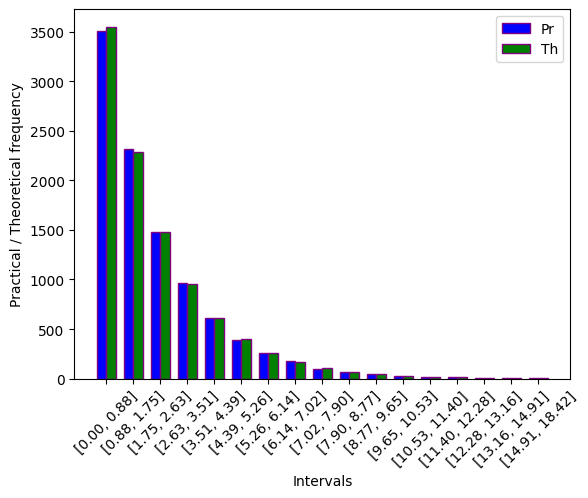


----INFO----
mean = 2.0067432142715043
dispersion = 3.968721591049856
theor_chi_squared = 28.9
chi_squared = 6.17294318223056
-------------------------------------------------------------------------------
lambda = 1.0
min = 6.446200950412013e-05, max = 11.119570156186034, step = 0.5559752847088265
merge №13 with 14
merge №14 with 15
merge №15 with 16
merge №17 with 18
merge №18 with 19
[0.00, 0.56] | 4226
[0.56, 1.11] | 2497
[1.11, 1.67] | 1405
[1.67, 2.22] | 794
[2.22, 2.78] | 445
[2.78, 3.34] | 270
[3.34, 3.89] | 146
[3.89, 4.45] | 91
[4.45, 5.00] | 51
[5.00, 5.56] | 32
[5.56, 6.12] | 22
[6.12, 6.67] | 8
[6.67, 7.23] | 5
[7.23, 9.45] | 6
[9.45, 12.79] | 2
theor: [4264.59858421794, 2445.80123621343, 1402.6979489231658, 804.4650181628907, 461.3708645860928, 264.60202728892, 151.7526099274125, 87.03204149919873, 49.91397677536738, 28.626297104094146, 16.41754351851756, 9.415668893615615, 5.400005220891042, 6.475975527960009, 0.757647722076731]


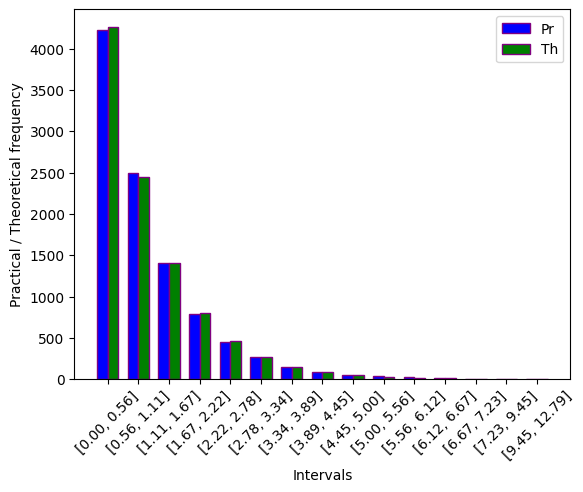


----INFO----
mean = 1.0074622738325094
dispersion = 1.020733374065428
theor_chi_squared = 28.9
chi_squared = 5.247909957082709
-------------------------------------------------------------------------------
lambda = 2
min = 2.6265548001160336e-05, max = 5.196684131009068, step = 0.2598328932730533
merge №14 with 15
merge №16 with 17
merge №17 with 18
merge №18 with 19
[0.00, 0.26] | 4032
[0.26, 0.52] | 2456
[0.52, 0.78] | 1399
[0.78, 1.04] | 835
[1.04, 1.30] | 509
[1.30, 1.56] | 309
[1.56, 1.82] | 192
[1.82, 2.08] | 116
[2.08, 2.34] | 60
[2.34, 2.60] | 32
[2.60, 2.86] | 22
[2.86, 3.12] | 16
[3.12, 3.38] | 9
[3.38, 3.64] | 6
[3.64, 4.16] | 5
[4.16, 5.46] | 2
theor: [4052.5943277545375, 2410.1559723989167, 1433.3662196355933, 852.450523169865, 506.96875962189165, 301.504094662095, 179.3102974743616, 106.63929064173409, 63.42044193082788, 37.71735943194109, 22.431240767288447, 13.34029131249203, 7.933728416917309, 4.718341235506569, 4.474923414875656, 2.2666988725790964]


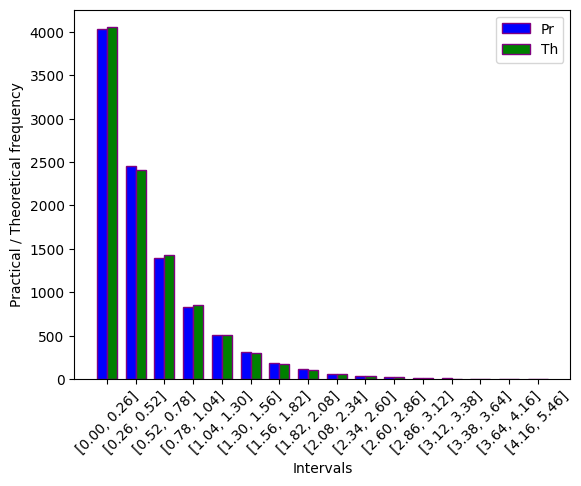


----INFO----
mean = 0.5024550672200252
dispersion = 0.2543899549981761
theor_chi_squared = 28.9
chi_squared = 6.214832511312582


In [36]:
list_of_lambda = [0.5, 1.0, 2]
for lambda_val in list_of_lambda:
    print('-------------------------------------------------------------------------------')
    print(f'lambda = {lambda_val}')
    data = create_values(lambda_val, num_of_values)
    mean, dispersion, current, theoretical, chi_squared = calculate(data, bins, lambda_val)
    print()
    print('----INFO----')
    print(f'mean = {mean}')
    print(f'dispersion = {dispersion}')
    print(f'theor_chi_squared = {theor_chi_squared}')
    print(f'chi_squared = {chi_squared}')

# Task 2

-------------------------------------------------------------------------------
alpha = 0, sigma = 0.5
min = -1.8035217924099798, max = 1.8920659155380424, step = 0.1847793853974011
merge №0 with 1
merge №18 with 19
[-1.80, -1.43] | 20
[-1.43, -1.25] | 28
[-1.25, -1.06] | 110
[-1.06, -0.88] | 224
[-0.88, -0.69] | 428
[-0.69, -0.51] | 730
[-0.51, -0.33] | 1045
[-0.33, -0.14] | 1326
[-0.14, 0.04] | 1412
[0.04, 0.23] | 1431
[0.23, 0.41] | 1172
[0.41, 0.60] | 895
[0.60, 0.78] | 594
[0.78, 0.97] | 338
[0.97, 1.15] | 146
[1.15, 1.34] | 72
[1.34, 1.52] | 24
[1.52, 2.08] | 5
theor: [19.110076829480345, 41.72482230722281, 103.96710889392334, 226.32496753301618, 430.4382015584946, 715.2151565044137, 1038.2806082226853, 1316.886355542989, 1459.2830901168531, 1412.828484623263, 1195.0819236442578, 883.2074423998238, 570.2716866585329, 321.6999449448393, 158.54958994896, 68.26812422092662, 25.68042502732502, 11.469885022607627]


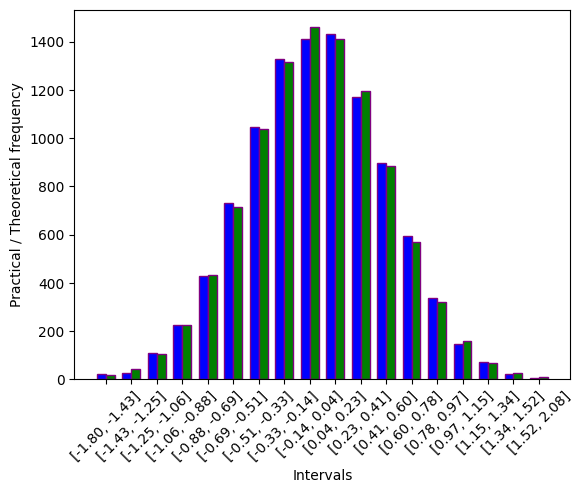


----INFO----
mean = 0.0008430206137134002
dispersion = 0.24780238067474755
theor_chi_squared = 27.6
chi_squared = 10.845517617867134
-------------------------------------------------------------------------------
alpha = 1, sigma = 1
min = -2.6691340278692395, max = 4.4380842549707875, step = 0.3553609141420013
merge №0 with 1
[-2.67, -1.96] | 20
[-1.96, -1.60] | 27
[-1.60, -1.25] | 80
[-1.25, -0.89] | 175
[-0.89, -0.54] | 329
[-0.54, -0.18] | 573
[-0.18, 0.17] | 904
[0.17, 0.53] | 1123
[0.53, 0.88] | 1314
[0.88, 1.24] | 1371
[1.24, 1.60] | 1256
[1.60, 1.95] | 1037
[1.95, 2.31] | 771
[2.31, 2.66] | 504
[2.66, 3.02] | 272
[3.02, 3.37] | 158
[3.37, 3.73] | 56
[3.73, 4.08] | 22
[4.08, 4.44] | 7
theor: [14.244548605721896, 30.737649434150654, 76.78063668019144, 169.25579040712765, 329.26957168126984, 565.3020612703417, 856.5136422024902, 1145.2906751730823, 1351.5340371876612, 1407.5676405833613, 1293.7277080922993, 1049.4148163252698, 751.243441368299, 474.6144723503945, 264.621276059394

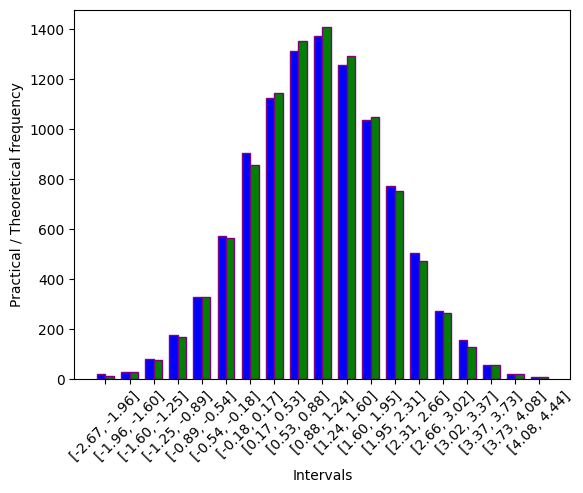


----INFO----
mean = 1.0045469987967575
dispersion = 1.0319270080683183
theor_chi_squared = 27.6
chi_squared = 18.009346649727224
-------------------------------------------------------------------------------
alpha = 2, sigma = 1.5
min = -2.8957971174823562, max = 8.117618631085488, step = 0.5506707874283923
[-2.90, -2.35] | 12
[-2.35, -1.79] | 44
[-1.79, -1.24] | 115
[-1.24, -0.69] | 216
[-0.69, -0.14] | 385
[-0.14, 0.41] | 655
[0.41, 0.96] | 941
[0.96, 1.51] | 1290
[1.51, 2.06] | 1497
[2.06, 2.61] | 1460
[2.61, 3.16] | 1186
[3.16, 3.71] | 904
[3.71, 4.26] | 630
[4.26, 4.81] | 367
[4.81, 5.36] | 178
[5.36, 5.91] | 79
[5.91, 6.47] | 27
[6.47, 7.02] | 8
[7.02, 7.57] | 5
[7.57, 8.12] | 0
theor: [13.357270310462656, 38.237838240348864, 95.79907611403907, 210.05318409684628, 403.09162982620194, 677.0027298374565, 995.1617424520207, 1280.3151939686484, 1441.6582365436595, 1420.7935393904106, 1225.5265911005945, 925.2014597132966, 611.3208619518306, 353.5231434042477, 178.9276613373892, 79.

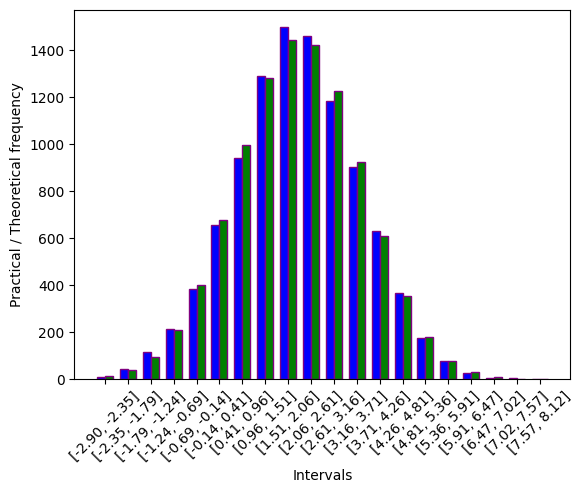


----INFO----
mean = 2.005162608591349
dispersion = 2.25187616718509
theor_chi_squared = 27.6
chi_squared = 17.81618546926542


In [37]:
list_alpha = [0, 1, 2]
list_sigma = [0.5, 1, 1.5]

for i in range(0, tests):
    print('-------------------------------------------------------------------------------')
    data2 = create_values2(num_of_values, list_sigma[i], list_alpha[i])
    print(f'alpha = {list_alpha[i]}, sigma = {list_sigma[i]}')
    mean, dispersion, current, theoretical, chi_squared = calculate2(data2, bins, list_alpha[i], list_sigma[i])
    print()
    print('----INFO----')
    print(f'mean = {mean}')
    print(f'dispersion = {dispersion}')
    print(f'theor_chi_squared = {theor_chi_squared2}')
    print(f'chi_squared = {chi_squared}')

# Task 3

-------------------------------------------------------------------------------
a = 1220703125; c = 2147483648
min = 0.00015091896057128906, max = 0.9998953342437744, step = 0.04998722076416016
[0.00, 0.05] | 562
[0.05, 0.10] | 508
[0.10, 0.15] | 510
[0.15, 0.20] | 533
[0.20, 0.25] | 516
[0.25, 0.30] | 515
[0.30, 0.35] | 491
[0.35, 0.40] | 467
[0.40, 0.45] | 501
[0.45, 0.50] | 514
[0.50, 0.55] | 451
[0.55, 0.60] | 489
[0.60, 0.65] | 505
[0.65, 0.70] | 471
[0.70, 0.75] | 479
[0.75, 0.80] | 473
[0.80, 0.85] | 525
[0.85, 0.90] | 498
[0.90, 0.95] | 504
[0.95, 1.00] | 488
theor: [500.0, 500.0, 500.0000000000001, 499.99999999999994, 499.99999999999994, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002, 500.0000000000002]


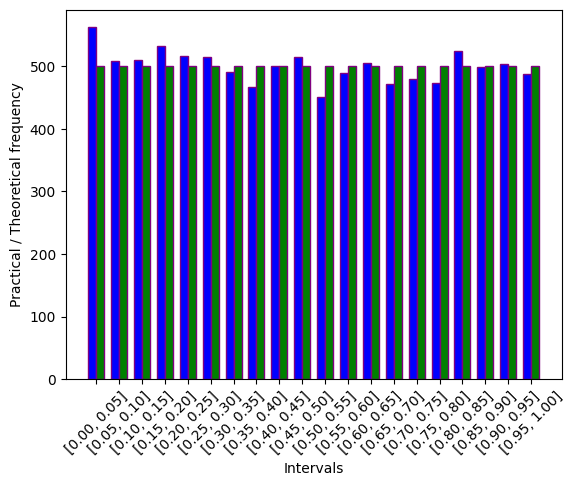


----INFO----
mean = 0.4935664164210453
dispersion = 0.08503428750341269
theor_chi_squared = 27.6
chi_squared = 24.58400000000012
-------------------------------------------------------------------------------
a = 78125; c = 32768
min = 0.00018733477918431163, max = 0.9999892489868216, step = 0.04999009571038186
[0.00, 0.05] | 522
[0.05, 0.10] | 514
[0.10, 0.15] | 464
[0.15, 0.20] | 516
[0.20, 0.25] | 495
[0.25, 0.30] | 508
[0.30, 0.35] | 517
[0.35, 0.40] | 499
[0.40, 0.45] | 512
[0.45, 0.50] | 495
[0.50, 0.55] | 489
[0.55, 0.60] | 499
[0.60, 0.65] | 473
[0.65, 0.70] | 490
[0.70, 0.75] | 469
[0.75, 0.80] | 541
[0.80, 0.85] | 483
[0.85, 0.90] | 486
[0.90, 0.95] | 521
[0.95, 1.00] | 506
theor: [499.99999999999994, 499.99999999999994, 499.99999999999983, 500.0000000000001, 500.0000000000001, 500.0000000000001, 500.0000000000001, 500.0000000000001, 500.0000000000001, 499.99999999999955, 499.99999999999955, 499.99999999999955, 499.99999999999955, 499.99999999999955, 499.99999999999955, 499.

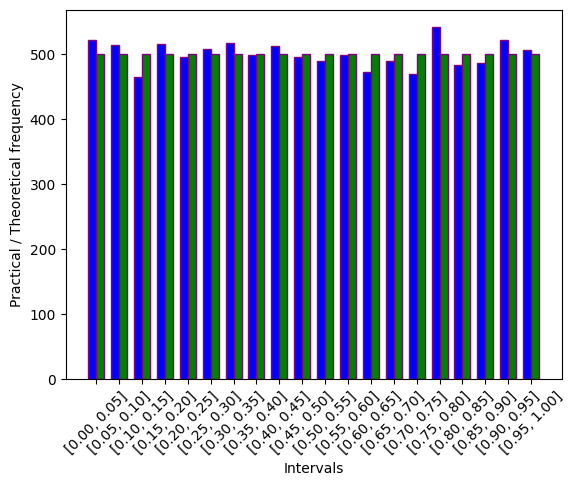


----INFO----
mean = 0.4989603668161215
dispersion = 0.0841258455520731
theor_chi_squared = 27.6
chi_squared = 14.669999999999886
-------------------------------------------------------------------------------
a = 244140625; c = 1024
min = 2.5272369384765625e-05, max = 0.9999871253967285, step = 0.04999809265136719
[0.00, 0.05] | 502
[0.05, 0.10] | 480
[0.10, 0.15] | 476
[0.15, 0.20] | 549
[0.20, 0.25] | 532
[0.25, 0.30] | 549
[0.30, 0.35] | 455
[0.35, 0.40] | 492
[0.40, 0.45] | 499
[0.45, 0.50] | 473
[0.50, 0.55] | 500
[0.55, 0.60] | 479
[0.60, 0.65] | 500
[0.65, 0.70] | 465
[0.70, 0.75] | 517
[0.75, 0.80] | 525
[0.80, 0.85] | 490
[0.85, 0.90] | 472
[0.90, 0.95] | 530
[0.95, 1.00] | 515
theor: [500.0, 500.0, 500.00000000000017, 499.9999999999999, 499.9999999999999, 499.9999999999999, 499.9999999999999, 499.9999999999999, 499.9999999999999, 500.00000000000045, 500.00000000000045, 500.00000000000045, 500.00000000000045, 500.00000000000045, 500.00000000000045, 500.00000000000045, 500.000

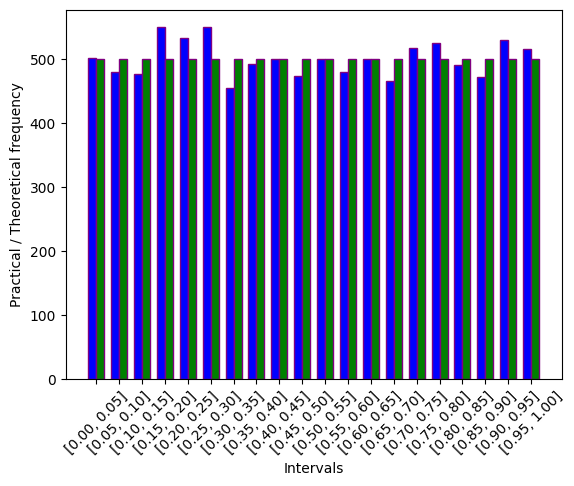


----INFO----
mean = 0.5000114063813439
dispersion = 0.08410662803544888
theor_chi_squared = 27.6
chi_squared = 28.428000000000104


In [38]:
list_a = [pow(5, 13), pow(5, 7), pow(5, 12)]
list_c = [pow(2, 31), pow(2, 15), pow(2, 10)]


for i in range(0, tests):
    print('-------------------------------------------------------------------------------')
    print(f'a = {list_a[i]}; c = {list_c[i]}')
    data3 = create_values3(list_a[i], list_c[i], num_of_values)
    mean, dispersion, current, theoretical, chi_squared = calculate3(data3, bins, list_a[i], list_c[i])
    print()
    print('----INFO----')
    print(f'mean = {mean}')
    print(f'dispersion = {dispersion}')
    print(f'theor_chi_squared = {theor_chi_squared2}')
    print(f'chi_squared = {chi_squared}')